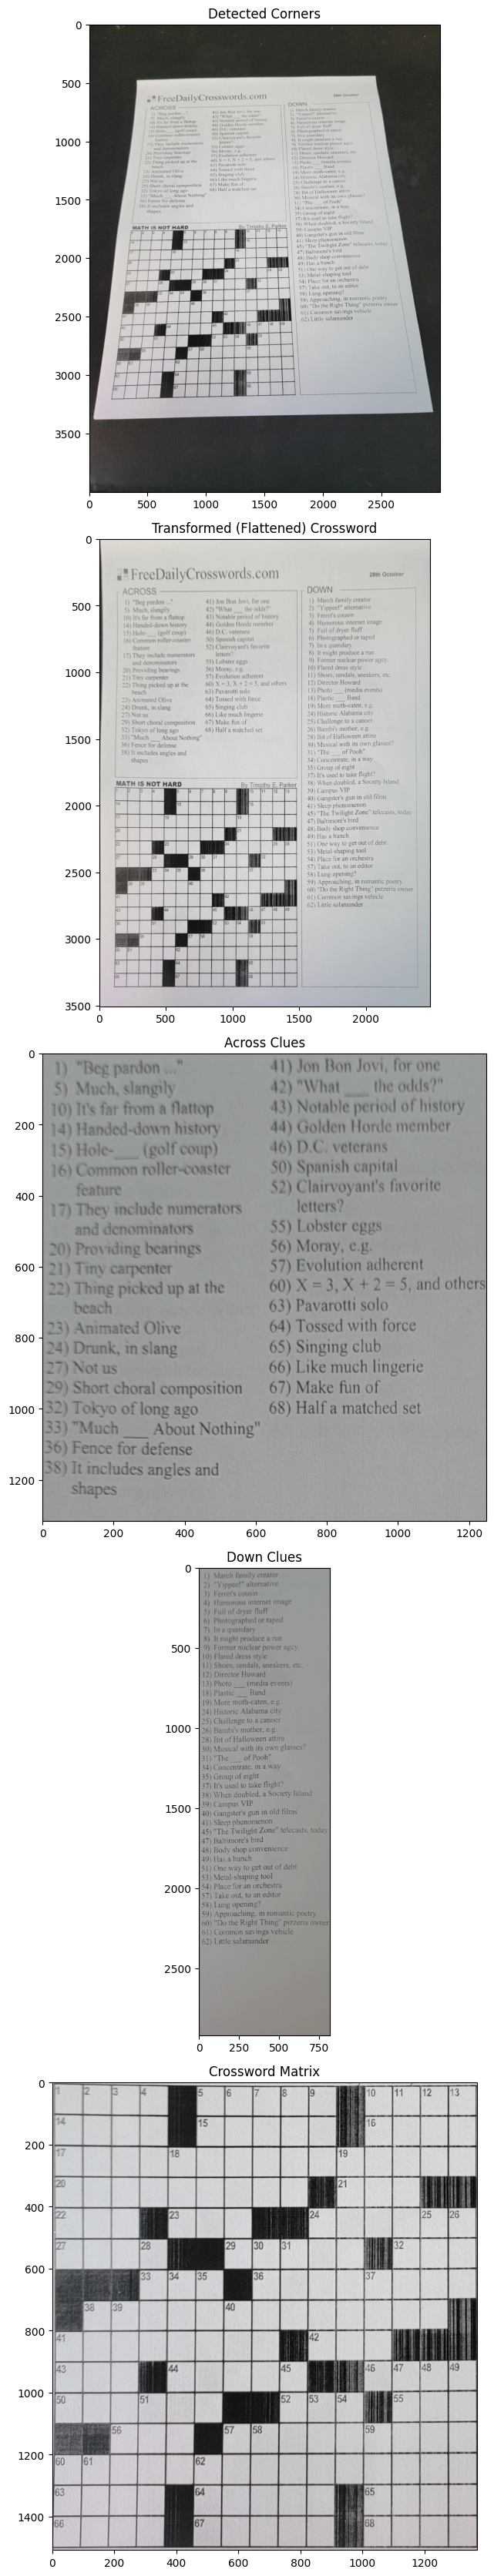

200


In [11]:
import requests
import matplotlib.pyplot as plt
import numpy as np
import io

# Set the URL of the server
url = "http://127.0.0.1:5000"

# Path to the image file on your local disk
image_path = "Testing/crosswordE.jpg"  # Change as needed

# Open the image file in binary mode
with open(image_path, "rb") as image_file:
    # Prepare the files parameter with the image file
    files = {"image": image_file}
    
    # Send the POST request with body and files
    res = requests.post(url, files=files)

# Check the response
if res.status_code == 200:
    response_data = res.json()
    original_image_hex = response_data['original_image']
    transformed_image_hex = response_data['transformed_image']
    box1_across_hex = response_data['box1_across']
    box2_down_hex = response_data['box2_down']
    box3_matrix_hex = response_data['box3_matrix']
    # box3_2d_matrix_hex = response_data['box3_2d_matrix']

    # Convert hex to bytes
    original_image_bytes = bytes.fromhex(original_image_hex)
    transformed_image_bytes = bytes.fromhex(transformed_image_hex)
    box1_across_bytes = bytes.fromhex(box1_across_hex)
    box2_down_bytes = bytes.fromhex(box2_down_hex)
    box3_matrix_bytes = bytes.fromhex(box3_matrix_hex)
    # box3_2d_matrix_bytes = bytes.fromhex(box3_2d_matrix_hex)

    # Create a larger figure
    plt.figure(figsize=(60, 40))  # Adjust the figure size as needed

    # Display original image
    original_image = plt.imread(io.BytesIO(original_image_bytes), format='png')
    plt.subplot(611), plt.imshow(original_image)
    plt.title('Detected Corners')
    
    # Display transformed image
    transformed_image = plt.imread(io.BytesIO(transformed_image_bytes), format='png')
    plt.subplot(612), plt.imshow(transformed_image)
    plt.title('Transformed (Flattened) Crossword')
    
    # Display transformed image
    box1_across_image = plt.imread(io.BytesIO(box1_across_bytes), format='png')
    plt.subplot(613), plt.imshow(box1_across_image)
    plt.title('Across Clues')    
    
    # Display transformed image
    box2_down_image = plt.imread(io.BytesIO(box2_down_bytes), format='png')
    plt.subplot(614), plt.imshow(box2_down_image)
    plt.title('Down Clues')    

    # Display transformed image
    box3_matrix_image = plt.imread(io.BytesIO(box3_matrix_bytes), format='png')
    plt.subplot(615), plt.imshow(box3_matrix_image, cmap='gray')
    plt.title('Crossword Matrix')
    
    # # Display transformed image
    # box3_2d_matrix_image = plt.imread(io.BytesIO(box3_2d_matrix_bytes), format='png')
    # plt.subplot(616), plt.imshow(box3_matrix_image, cmap='gray')
    # plt.title('Crossword Matrix')
    
    plt.tight_layout()  # Adjust spacing between subplots    
    plt.show()
    print(res.status_code)
else:
    if res.status_code != 200:
        print(f"Error: {res.status_code} - {res.text}")